# The Change in the Service Economy - A Dataset Exploration



## Table of Contents

- [Introduction](#intro)
    - [My Motivation](#motivation)
    - [Datasets](#datasets)
- [Wrangling](#wrangling)
    - [Metadata Cleaning](#metadata_cleaning)
    - [Numerical Data Cleaning](#numerical_cleaning)
    - [Data Trimming](#data_trimming)
    - [Utility Functions](#utility_functions)
- [Exploratory Data Analysis](#eda)<br>
    - [Has service-sector economic activity reached a peak? Or is the service economy still growing?](#1)<br>
    - [Does service-sector economic activity tend to be concentrated within any particular geographic regions?](#2)<br>
    - [Does service-sector economic activity tend to be concentrated within any particular economic groupings of countries?](#3)<br>
    - [Do countries tend to progress through an industrial revolution before developing a significant services sector?](#4)<br>
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

In the late 1700s, and throughout the 19th century, the Industrial Revolution transformed the economies of developed and developing nations. Industry is broadly defined as the production of goods and related services within an economy. It is typified by manufacturing, often on an assembly line. Ultimately, industry-related economic growth peaked in Europe and the United States in the early 20th century.

More recently, the world's industrialised economies began a transition to "post-industrial," or service-based, economies. The precise starting date of this transition is difficult to trace. An aim of this analysis is to gain a fuller understanding of when this transition began, whether it has peaked, how it is proceeding now. The analysis will also consider which countries have the most vibrant service economies.

The United Nations maintains a classification system known as the International Standard Industrial Classification of all Economic Activities (called "ISIC"). This schema neatly groups economic activities into various "divisions." A few pertinent examples of these divisions are:

* 01 - Crop and animal production, hunting and related service activities
* 30 - Manufacture of other transport equipment
* 33 - Repair and installation of machinery and equipment
* 62 - Computer programming, consultancy and related activities
* 63 - Information service activities

These divisions are aggregated into three larger groups called sectors. These sectors are named after the economic epochs previously discussed: Agricultural, Industry, and Services. The United Nations defines these sectors in terms of the groups that they aggregate, specifically:

* Agriculture - ISIC divisions 1-5
* Industry - ISIC divisions 10-45
* Services - ISIC divisions 50-99

The divisions (a two digit schema) are themselves aggregates of industry classes, which are a four digit scheme with the first two coming from the division into which it is classified. For example, Division 25 is described as "Manufacture of fabricated metal products, except machinery and equipment," and it contains occupation classes 2511 ("Manufacture of structural metal products") and 2512 ("Manufacture of tanks, reservoirs and containers of metal").

This analysis will address the following questions:

1. Has service-sector economic activity reached a peak? Or is the service economy still growing?
2. Does service-sector economic activity tend to be concentrated within any particular geographic regions?
3. Does service-sector economic activity tend to be concentrated within any particular economic groups? (ex: high income countries, low income countries...)
4. Do countries tend to progress through an industrial revolution before developing a signficant services sector?

<a id='motivation'></a>
### My Motivation

My education was Mechanical Engineering, and recently I completed my PhD. My plan is to leverage my business knowledge, analytical abilities, and the content of this nanodegree to transition into a Data Science career.

My prior employment has been in the Ocean Engineering industries. The activities of a Data Analyst appear to fall under either industry code 6209 ("Other Information Technology and Computer Service activities") or 6311 ("Data Processing, Hosting, and Related Activities"). The applicable division is either 62 ("Computer programming, consultancy and related activities") or 63 ("Information service activities"). This places data science work within the Services sector (50-99). Thus, my present career transition amounts to a transition from working in the "industry" sector to the "service" sector.

A major motivating factor for my transition into data science is my intention to capitalise on future employment trends. Research I conducted confirmed the common perception that some of today's best opportunities for salary and career growth are in the computer science and data science fields. Computer and data science occupations are obviously a tiny part of the Service sector, but a purposes of this analysis is to determine whether the service sector as a whole can be expected to continue growing as rapidly as it has been.

Just as important as compensation and growth opportunities, to my knowledge, service-sector employees have tended to be more competitive and higher-performing than those working within industry. I believe this is because higher-growth (and therefore more lucrative) service-industry jobs attract high-quality talent.

For these reasons, I believe my current career transition will ultimately pay off, both financially and in terms of work satisfaction.

<a id='datasets'></a>
### The Datasets

This analysis makes use of four datasets provided by WorldBank.org. The datasets utilised were downloaded from WorldBank.org on January 25, 2018. The specific URLs are as follows:

* Agriculture (% of GDP) - http://data.worldbank.org/indicator/NV.AGR.TOTL.ZS

* Industry (% of GDP) - http://data.worldbank.org/indicator/NV.IND.TOTL.ZS

* Services (% of GDP) - http://data.worldbank.org/indicator/NV.SRV.TETC.ZS

* GDP/capita (US dollars, inflation-adjusted) - http://data.worldbank.org/indicator/NY.GDP.PCAP.KD

In [30]:
# imports and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pprint as pp
import math

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### A Note on Methodology

The indexes to the provided datasets are either countries or aggregations of countries. The aggregations of countries come in four types. These are:

* Geographic aggregates (ex: Arab World, Euro area)

* Income aggregates (ex: Low income, Upper middle income)

* Characteristic aggregates (ex: Fragile and conflict-affected situations, heavily indebted poor countries)

* Whole world aggregate

Each of these datasets comes with multiple sets of CSV files. Among these are the actual economic data as well as metadata files. One of these metadata files contains information about each countrys' regional group and income group membership. Cleaning these metadata files is the focus of the following section, and cleaning of the numeric, economic data will follow.

<a id='metadata_cleaning'></a>
### Metadata Dataset Cleaning

First, generate dataframe files from the metadata CSV files.

In [31]:
meta_df = pd.read_csv('Metadata_Country_API.csv')

For the single metadata file, print shape and get a sense for data contained therein.

In [32]:
print('Shape before dropping columns: ' + str(meta_df.shape))

meta_df.head()

Shape before dropping columns: (263, 6)


,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,SNA data for 2000-2011 are updated from offici...,Aruba,NaN
1,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,WB-3 code changed from ADO to AND to align wit...,Andorra,NaN


The 'Country Code' and 'SpecialNotes' columns will not be useful for purposes of this analysis. 'Unnamed:5' is an extraction artifact that is not meaningful. Drop these columns.

The 'TableName' column is actually the name of the country. Rename this column accordingly and set as the index to the table.

Following these operations, the metadata dataframe is clean.

In [33]:
meta_df.drop(['Country Code', 'SpecialNotes', 'Unnamed: 5'], 
             axis = 1, inplace=True)
meta_df.columns = ['Region Group', 'Income Group', 'Country Name']
meta_df.set_index('Country Name', inplace=True)

print('Shape after dropping columns and setting indexes: '\
      + str(meta_df.shape))

meta_df.head()

Shape after dropping columns and setting indexes: (263, 2)


,Region Group,Income Group
Country Name,,
Aruba,Latin America & Caribbean,High income
Afghanistan,South Asia,Low income
Angola,Sub-Saharan Africa,Lower middle income
Albania,Europe & Central Asia,Upper middle income
Andorra,Europe & Central Asia,High income


<a id='numerical_cleaning'></a>
### Numerical Dataset Cleaning

Similar to the processing of the metadata file, extract dataframes from the CSV file. 

In [34]:
agr_filename = 'API_NV.AGR.TOTL.ZS.csv'
ind_filename = 'API_NV.IND.TOTL.ZS.csv'
ser_filename = 'API_NV.SRV.TETC.ZS.csv'
gdp_filename = 'API_NY.GDP.PCAP.KD.csv'

agr_df = pd.read_csv(agr_filename, header=4)
ind_df = pd.read_csv(ind_filename, header=2)
ser_df = pd.read_csv(ser_filename, header=2)
gdp_df = pd.read_csv(gdp_filename, header=2)

Inspection shows that the numeric datasets are nearly identical. Going forward I will manipulate them as a group wherever possible.

To facilitate accessing the dataframes within a list of numeric dataframes via for-loops, assign appropriate short names. Assign a similar name to the metadata file for completeness.

In [35]:
agr_df.name = "Agr"
ind_df.name = "Ind"
ser_df.name = "Ser"
gdp_df.name = "GDP"

meta_df.name = 'Metadata'

num_dfs = [agr_df,
           ind_df,
           ser_df,
           gdp_df]

Print shape and first several rows prior to manipulating, to get a sense for the data contained in these files.

In [36]:
print('Shapes before dropping extraneous columns\n')

for df in num_dfs:
    print(df.name + ' df shape: ' + str(df.shape))

num_dfs[0].head()

Shapes before dropping extraneous columns

Agr df shape: (264, 62)
Ind df shape: (264, 63)
Ser df shape: (264, 63)
GDP df shape: (264, 63)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.427988,0.506252,0.498384,0.512418,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,25.394741,30.205602,27.091540,24.507440,24.603247,23.891372,23.463126,21.400722,21.910295,NaN
2,Angola,AGO,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,19.420535,19.409781,20.658189,20.958124,21.660680,22.428507,22.903075,22.857812,22.894886,NaN
4,Andorra,AND,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,0.479778,0.471054,0.542998,0.587770,0.679288,0.640692,0.551640,0.520920,NaN,NaN


'Country Code' will not be useful for purposes of this analysis. 'Indicator Name' and 'Indicator Code' are identical for each row. '2017' is consistently null.

'Unnamed: 62' is an extraction artifact that is not meaningful. Drop all of these columns.

Set the index for each dataset to be the name of the countries.

In [37]:
agr_df.drop(['Country Code', 'Indicator Name', 'Indicator Code',\
             '2017'], axis = 1, inplace=True)
ind_df.drop(['Country Code', 'Indicator Name', 'Indicator Code',\
             '2017', 'Unnamed: 62'], axis = 1, inplace=True)
ser_df.drop(['Country Code', 'Indicator Name', 'Indicator Code',\
             '2017', 'Unnamed: 62'], axis = 1, inplace=True)
gdp_df.drop(['Country Code', 'Indicator Name', 'Indicator Code',\
             '2017', 'Unnamed: 62'], axis = 1, inplace=True)

for df in num_dfs:
    df.set_index('Country Name', inplace=True)

Print the shapes after dropping extraneous columns and setting indexes, to confirm uniformity.

In [38]:
print('Shapes after dropping extraneous columns and setting indexes:\n')

for df in num_dfs:
    print(df.name + ' df shape: ' + str(df.shape))

num_dfs[0].head()

Shapes after dropping extraneous columns and setting indexes:

Agr df shape: (264, 57)
Ind df shape: (264, 57)
Ser df shape: (264, 57)
GDP df shape: (264, 57)


,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.449522,0.427988,0.506252,0.498384,0.512418,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.622854,25.394741,30.205602,27.091540,24.507440,24.603247,23.891372,23.463126,21.400722,21.910295
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19.874798,19.420535,19.409781,20.658189,20.958124,21.660680,22.428507,22.903075,22.857812,22.894886
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.436699,0.479778,0.471054,0.542998,0.587770,0.679288,0.640692,0.551640,0.520920,NaN


Compare each of the indexes and each of the columns in dataframes 2 through 4 ('Ind', 'Ser', 'GDP') to dataframe 1 ('Agr'). The empty lists following this cell confirm that the indexes and columns are all identical.

Following this operation, the numerical dataframes are clean, but small differences between the indexes of the numerical dataframes and the metadata dataframe still need to be reconciled.

In [39]:
print('Ensure identical index(es) across all numerical datasets')
for df in num_dfs[1:]:
    print(num_dfs[0].name + ' index compared to ' + df.name\
           + ' index:\n       '\
           + str(num_dfs[0].index.difference(df.index)))

print('\nEnsure identical columns across all numerical datasets')
for df in num_dfs[1:]:
    print(num_dfs[0].name + ' columns compared to ' + df.name\
           + ' columns:       '\
           + str(num_dfs[0].columns.difference(df.columns)))

Ensure identical index(es) across all numerical datasets
Agr index compared to Ind index:
       Index([], dtype='object', name='Country Name')
Agr index compared to Ser index:
       Index([], dtype='object', name='Country Name')
Agr index compared to GDP index:
       Index([], dtype='object', name='Country Name')

Ensure identical columns across all numerical datasets
Agr columns compared to Ind columns:       Index([], dtype='object')
Agr columns compared to Ser columns:       Index([], dtype='object')
Agr columns compared to GDP columns:       Index([], dtype='object')


#### Reconciling Indexes of Metadata and Numerical Datasets

Next, reconcile the indexes of the numerical dataframes with the metadata dataframes. Visual inspection shows any differences to be minor differences in character coding (possibly unicode versus a more limited character set).

In [40]:
df_differences = list(num_dfs[0].index.difference(meta_df.index))
meta_differences = list(meta_df.index.difference(agr_df.index))

for difference in df_differences:
    print('num - ' + str(num_dfs[0].index.get_loc(difference))\
           + ' - ' + str(difference))

print('\r')

for difference in meta_differences:
    print('meta - ' + str(meta_df.index.get_loc(difference))\
           + ' - ' + str(difference))

num - 39 - Cote d'Ivoire
num - 49 - Curacao
num - 228 - East Asia & Pacific (IDA & IBRD countries)
num - 229 - Europe & Central Asia (IDA & IBRD countries)
num - 191 - Korea, Dem. People’s Rep.
num - 234 - Latin America & the Caribbean (IDA & IBRD countries)
num - 236 - Middle East & North Africa (IDA & IBRD countries)
num - 108 - Not classified
num - 217 - Sao Tome and Principe
num - 239 - Sub-Saharan Africa (IDA & IBRD countries)

meta - 49 - Curaçao
meta - 39 - Côte d'Ivoire
meta - 227 - East Asia & Pacific (IDA & IBRD)
meta - 228 - Europe & Central Asia (IDA & IBRD)
meta - 190 - Korea, Dem. People's Rep.
meta - 233 - Latin America & Caribbean (IDA & IBRD)
meta - 235 - Middle East & North Africa (IDA & IBRD)
meta - 238 - Sub-Saharan Africa (IDA & IBRD)
meta - 216 - São Tomé and Principe


The foregoing shows that at a certain point the indexes of the numerical dataframes end up greater than the corresponding indexes to the metadata dataframe by 1. 

Further inspection shows that this is due to an empty row called 'Not classified'. The following confirms that the row is indeed empty.

In [41]:
num_dfs[0].loc['Not classified'].isnull().all()

True

The following loop deletes the empty row from each of the dataframes, then confirms that the indexes for the numerical dataframes contain the same number of values as the metadata dataframe.

In [42]:
for df in num_dfs:
    df.drop(['Not classified'], inplace=True)

print(num_dfs[0].index.size == meta_df.index.size)

True


The following recalculates the differences between the numerical and metadata dataframes. For the index of each difference, it prints the index name (or country name) for the numerical and metadata dataframes. This way, they can be compared side-by-side.

In [43]:
differences = list(num_dfs[0].index.difference(meta_df.index))

indices = []

for diff in differences:
    indices.append(num_dfs[0].index.get_loc(diff))
    
for ind in indices:
    print(str(ind) + ' ' + num_dfs[0].index[ind] + '\n  - '\
          + meta_df.index[ind])

39 Cote d'Ivoire
  - Côte d'Ivoire
49 Curacao
  - Curaçao
227 East Asia & Pacific (IDA & IBRD countries)
  - East Asia & Pacific (IDA & IBRD)
228 Europe & Central Asia (IDA & IBRD countries)
  - Europe & Central Asia (IDA & IBRD)
190 Korea, Dem. People’s Rep.
  - Korea, Dem. People's Rep.
233 Latin America & the Caribbean (IDA & IBRD countries)
  - Latin America & Caribbean (IDA & IBRD)
235 Middle East & North Africa (IDA & IBRD countries)
  - Middle East & North Africa (IDA & IBRD)
216 Sao Tome and Principe
  - São Tomé and Principe
238 Sub-Saharan Africa (IDA & IBRD countries)
  - Sub-Saharan Africa (IDA & IBRD)


As suspected, the differences between the two sets of indexes are not consequential. Replace the indexes of the numerical dataframes with the indexes of the metadata dataframe.

In [44]:
for num_df in num_dfs:
    num_df.index = meta_df.index

<a id='data_trimming'></a>
### Data Trimming

First, determine all the unique datatypes in the tables. As shown, there is only numeric data ('float' datatype) in the "numeric" dataframes.

The metadata dataframe contains objects, which inspection shows are strings.

In [45]:
for df in num_dfs:
    print(str(df.dtypes.unique()) + '   <- datatypes in '\
          + df.name + ' dataframe')
    
# print(str(meta_df.dtypes.unique()) + '         <- datatypes in '\
#       + meta_df.name + ' dataframe')

print(str(type(meta_df.loc['Aruba']['Region Group'])))

[dtype('float64')]   <- datatypes in Agr dataframe
[dtype('float64')]   <- datatypes in Ind dataframe
[dtype('float64')]   <- datatypes in Ser dataframe
[dtype('float64')]   <- datatypes in GDP dataframe
<class 'str'>


In the numeric dataframes, a large percentage of the data is the numeric float called 'NaN' - Not a Number. This is essentially the same thing as null or unavailable data.

The following counts the number of null datapoints.

In [46]:
total_datapoints = num_dfs[0].index.size * num_dfs[0].columns.size

null_report_string = str(total_datapoints)\
    + ' total datapoints\nNull count:    '
for df in num_dfs:
    null_count = df.isnull().sum().sum()
    null_percent = int(null_count / total_datapoints * 100)
    null_report_string += (str(null_count) + ' (' + df.name + ')    ')
print(null_report_string)

14991 total datapoints
Null count:    6655 (Agr)    6682 (Ind)    6668 (Ser)    3937 (GDP)    


The amount of null data means that it is not possible to simply eliminate all countries or years with null data. The null values will just have to be handled as they are encountered.

It is necessary to remove data with errors, however. The data in the Agriculture, Industry, and Service dataframes contain numeric percentages. For a given country and year, the sum of the values in the three dataframes should be approximately 100.

In [47]:
# hundred_df now contains values that should be near 100 if the 
#     data is valid.
hundred_df = agr_df
hundred_df = hundred_df.add(ind_df)
hundred_df = hundred_df.add(ser_df)

# threshold for how far away from 100% the data can be.
#    threshold of 2 results in 6844 - 6655 = 189 new null values
threshold = 2.0

# error_mask will contain true values for error-free datapoints, 
#    false values for DataFrames that are currently NaN, or 
#    contain errors.
error_mask = (hundred_df - 100).abs() < threshold

Following application of the error mask to each of the numeric dataframes results in the following number of null values.

In [48]:
for df in num_dfs:
    df.where(error_mask, float('NaN'), inplace=True)

null_report_string = str(total_datapoints)\
    + ' total datapoints\nNull count:    '
for df in num_dfs:
    null_count = df.isnull().sum().sum()
    null_percent = int(null_count / total_datapoints * 100)
    null_report_string += (str(null_count) + ' (' + df.name + ')    ')
print(null_report_string)

14991 total datapoints
Null count:    6844 (Agr)    6844 (Ind)    6844 (Ser)    6997 (GDP)    


For completeness, also eliminate values from the numerical dataframes where the GDP dataframe is missing values.

Following application of this mask, each of the numeric dataframes should have the exact same number of NaN values.

In [49]:
gdp_nan_mask = gdp_df.notnull()

for df in num_dfs:
    df.where(gdp_nan_mask, float('NaN'), inplace=True)

null_report_string = str(total_datapoints)\
    + ' total datapoints\nNull count:    '
for df in num_dfs:
    null_count = df.isnull().sum().sum()
    null_percent = int(null_count / total_datapoints * 100)
    null_report_string += (str(null_count)\
                           + ' (' + df.name + ')    ')
print(null_report_string)

14991 total datapoints
Null count:    6997 (Agr)    6997 (Ind)    6997 (Ser)    6997 (GDP)    


At this point, the data is cleaned and trimmed. There is a significant percentage of the data that is null (nearly half!) so this will need to be manually handled on a case-by-case basis as the null values are encountered.

#### Create Groups for Convenience Later

For convenience, the indexes to the DataFrames are grouped as follows:
* Countries
* Income Groups
* Regions
* Other Groups


In [50]:
# To clarify remainder of analysis:
#    Capture index entries as members of "countries," "income_group," 
#    "regional_group," or "other_group"
#    Capture column entries as "years"

income_group = []
region_group = []
other_group = []
countries = []

index_type = {'countries' : countries,
              'income_group' : income_group,
              'region_group' : region_group,
              'other_group' : other_group}

years = list(meta_df.columns)

for item in meta_df['Region Group']:
    if type(item) is str and item not in region_group:
        region_group.append(item)

for item in meta_df['Income Group']:
    if type(item) is str and item not in income_group:
        income_group.append(item)

for item in meta_df.index:
    if type(meta_df.loc[item]['Region Group']) is not str: 
        # if not string, the the region column holds NaN,
        #   the only rows with NaNs in the region column are 
        #   groups of countries. If they are not already 
        #   assigned to a group, then they must belong in "other"
        if item not in income_group and item not in region_group:
            other_group.append(item)
    else:                                            
        # if the region column holds a string, then the
        #   row index must be a country name
        countries.append(item)                       

# Following check ensures that all index entries are accounted 
#   for in one of the 4 types of entries.

print(meta_df.index.size == len(income_group) + len(region_group)\
      + len(other_group) + len(countries))

True


The check at the end of the previous block of text confirms that all of the available entires are accounted for among the groups.

<a id='utility_functions'></a>
### Utility Functions

The following are utility functions to be used in the data exploration section. They are included here rather than among the plots to minimise the amount of scrolling required when reading the data exploration section.

In [52]:
# Extracts a labeled list of data from the DataFrames, to feed into 
#   the line plot generating functions.

def extract_data(start_year, end_year, index_list, dollars=False):
    '''
    Extracts data from the DataFrames, placing it into a nested dictionary
    that is readable by the 'print_3_index_line_plot' and
    'print_1_country_line_plot' functions. See output format 
    following this function definition.
    '''
    
    dataset = {} # overall data structure
    for index in index_list: # iterates over countries/indexes
        
        dataset[index] = {} # level will contain sectors
        for df in num_dfs[:3]: # iterates over sectors
            
            dataset[index][df.name[:3]] = {} # level will contain years
            for year in range(int(start_year), int(end_year) + 1): 
                # iterates over years
                                        
                if dollars:
                    gdp_contribution = int(round(\
                        df.loc[index][str(year)] / 100 *\
                        num_dfs[3].loc[index][str(year)]))
                    dataset[index][df.name][year] = gdp_contribution
                else:                    
                    dataset[index][df.name][year] =\
                         int(round(df.loc[index][str(year)]))
            
    return dataset

The following is an example of the data which the extract_data function returns from the DataFrame.

In [54]:
pp.pprint(extract_data(2005, 2007, ['United Kingdom', 
                                    'Singapore', 
                                    'South Africa', 
                                    'United States'], dollars=True))

{'Singapore': {'Agr': {2005: 23, 2006: 22, 2007: 20},
               'Ind': {2005: 12951, 2006: 13391, 2007: 12970},
               'Ser': {2005: 27046, 2006: 28812, 2007: 31201}},
 'South Africa': {'Agr': {2005: 180, 2006: 184, 2007: 217},
                  'Ind': {2005: 2049, 2006: 2073, 2007: 2177},
                  'Ser': {2005: 4538, 2006: 4797, 2007: 4939}},
 'United Kingdom': {'Agr': {2005: 255, 2006: 252, 2007: 260},
                    'Ind': {2005: 8703, 2006: 8857, 2007: 8800},
                    'Ser': {2005: 30783, 2006: 31309, 2007: 31990}},
 'United States': {'Agr': {2005: 575, 2006: 524, 2007: 543},
                   'Ind': {2005: 10694, 2006: 11073, 2007: 11074},
                   'Ser': {2005: 37487, 2006: 37978, 2007: 38362}}}


In [55]:
def print_3_index_line_plot(dataset_list, y_offsets, title):
    '''
    Takes a nested list of dictionaries as output by the 'extract_data' 
    function, and generates a line plot. The dataset_list can contain data
    for three indexes maximum.
    '''
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    
    colors = {'Agr': ['green', 'lightgreen', 'darkgreen'],
              'Ind': ['red', 'pink', 'darkred'],
              'Ser': ['blue', 'lightblue', 'darkblue']}
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    rank = 0
    for dataset in dataset_list:
        for index_name, sectors in dataset.items():
            for sector_name, econ_data in sectors.items():
                y_pos = list(econ_data.values())[-1]

                label = index_name + ' '
                if sector_name == 'Agr':
                    label += 'Agriculture'
                elif sector_name == 'Ind':
                    label += 'Industry'
                else:
                    label += 'Service'

                color = colors[sector_name][rank // 3]

                rank += 1
                
                if label in y_offsets:
                    y_pos += y_offsets[label]
                
                plt.text(list(econ_data.keys())[-1] + .5, y_pos,\
                         label, fontsize=18, color=color)
                plt.plot(econ_data.keys(), econ_data.values(),\
                         color=color, linewidth=3.0)
    
    start_year = list(econ_data.keys())[0]
    end_year = list(econ_data.keys())[-1]
    
    ax.set_xlim(start_year - .5, end_year + .5)
    plt.xticks(range(start_year, end_year + 1,\
                    (end_year-start_year)//5), fontsize=18)
    
    plt.yticks(fontsize=18)
    fig.suptitle(title, fontsize=24, ha='center')

In [56]:
def print_1_index_line_plot(dataset_list, title):
    '''
    Takes a nested list of dictionaries as output by the 'extract_data' 
    function, and generates a line plot. The dataset_list can contain data
    for a single index only.
    '''
    fig, ax = plt.subplots(1, 1, figsize=(16, 9))
    
    colors = {'Agr': 'green',
              'Ind': 'red',
              'Ser': 'blue'}
    
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    for dataset in dataset_list:
        for index_name, sectors in dataset.items():
            for sector_name, econ_data in sectors.items():
                y_pos = list(econ_data.values())[-1]
                
                label = ''
                if sector_name == 'Agr':
                    label += 'Agriculture'
                elif sector_name == 'Ind':
                    label += 'Industry'
                else:
                    label += 'Service'
                    
                color = colors[sector_name]
                
                plt.text(list(econ_data.keys())[-1] + .5, y_pos, label,\
                         fontsize=18, color=color)
                plt.plot(econ_data.keys(), econ_data.values(),\
                         color=color, linewidth=3.0)
    
    start_year = list(econ_data.keys())[0]
    end_year = list(econ_data.keys())[-1]
    
    ax.set_xlim(start_year - .5, end_year + .5)
    plt.xticks(range(start_year, end_year + 1,\
                    (end_year-start_year)//5), fontsize=18)
    
    plt.yticks(fontsize=18)
    fig.suptitle(title, fontsize=24, ha='center')

In [57]:
def print_growth_info_graphic(index):
    '''
    Prints a stacked bar chart alongside a pie chart, both showing the 
    relative contributions of each of the economic sectors to a given 
    index's economic output for the years 1997 and 2015.
    '''
    fig, axs = plt.subplots(1, 2, figsize=(16, 9))
    
    c = ['lightblue', 'pink', 'lightgreen']
    
    gdp_97 = gdp_df.loc[index]['1997']
    gdp_15 = gdp_df.loc[index]['2015']
    
    agr_perc_97 = agr_df.loc[index]['1997']
    ind_perc_97 = ind_df.loc[index]['1997']
    ser_perc_97 = ser_df.loc[index]['1997']
    
    agr_perc_15 = agr_df.loc[index]['2015']
    ind_perc_15 = ind_df.loc[index]['2015']
    ser_perc_15 = ser_df.loc[index]['2015']

    agr_97 = agr_perc_97 * gdp_97 / 100
    ind_97 = ind_perc_97 * gdp_97 / 100
    ser_97 = ser_perc_97 * gdp_97 / 100
    
    agr_15 = agr_perc_15 * gdp_15 / 100
    ind_15 = ind_perc_15 * gdp_15 / 100
    ser_15 = ser_perc_15 * gdp_15 / 100
    
    agr_diff = agr_15 - agr_97
    ind_diff = ind_15 - ind_97
    ser_diff = ser_15 - ser_97
    gdp_diff = gdp_15 - gdp_97
    
    x_loc = [1, 2]
    heights = [gdp_97, gdp_15]
    
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['bottom'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    axs[0].spines['left'].set_visible(False)
    
    p_s = axs[0].bar(x_loc[0], ser_97, width=0.4, color=c[0])
    p_i = axs[0].bar(x_loc[0], ind_97, width=0.4, color=c[1],\
                     bottom=ser_97)
    p_a = axs[0].bar(x_loc[0], agr_97, width=0.4, color=c[2],\
                     bottom=ind_97+ser_97)
    
    axs[0].bar(x_loc[1], ser_15, width=0.4, color=c[0])
    axs[0].bar(x_loc[1], ind_15, width=0.4, color=c[1], bottom=ser_15)
    axs[0].bar(x_loc[1], agr_15, width=0.4, color=c[2],\
               bottom=ind_15+ser_15)
    
    axs[0].set_xlim(0.5, 2.5)
    
    ind = np.arange(2)
    axs[0].set_xticks([1, 2])
    axs[0].set_xticklabels(['1997', '2015'], fontsize=18)
    
    if ser_15 > 30000:
        axs[0].set_ylim(0, 65000)
        axs[0].set_yticklabels(labels=['0', '$ 10,000', '$ 20,000',\
                                       '$ 30,000', '$ 40,000',\
                                       '$ 50,000', '$ 60,000',\
                                       '$ 70,000'],  fontsize=18)
    elif ser_15 > 10000:
        axs[0].set_ylim(0, 30000)
        axs[0].set_yticklabels(labels=['0', '$ 5,000', '$ 10,000',\
                                       '$ 15,000', '$ 20,000',\
                                       '$ 25,000', '$ 30,000' ],  
                                       fontsize=18)
    else:
        axs[0].set_ylim(0, 14500)
        axs[0].set_yticklabels(labels=['0', '$ 2,000', '$ 4,000',\
                                       '$ 6,000', '$ 8,000',\
                                       '$ 10,000', '$ 12,000',\
                                       '$ 14,000'],\
                                       fontsize=18)
        
    axs[0].legend((p_s, p_i, p_a), ('Service', 'Industry',\
                                    'Agriculture'), loc=0, fontsize=18)
    
    axs[0].set_title(index + ' GDP Per-Capita', fontsize=18)
        
    perc = [ser_diff, ind_diff, agr_diff]
    
    axs[1].axis('equal')
    
    patches, texts, autotexts = axs[1].pie([ser_diff, ind_diff,\
                                            agr_diff],\
                                            labels=['Ser', 'Ind', 'Agr'],\
                                            autopct='%1.0f%%',\
                                            startangle=0, colors=c)
    for text in texts:
        text.set_size('18')
            
    for autotext in autotexts:
        autotext.set_size('18')
            
    axs[1].set_title('Contributions by Sector towards $'\
                     + str(int(gdp_diff))\
                     + ' increase in\n ' + index + ' Per-Capita '\
                     + 'GDP from 1997 to 2015', fontsize=18)

In [58]:
def print_time_delta_pies(indexes, start_year, mid_year, end_year):
    '''
    Prints a 3-wide matrix of pie charts for the list of indexes passed
    in.
    '''
    fig, axarr = plt.subplots(nrows = len(indexes), ncols = 3,\
                              figsize = (16, len(indexes)*4)) #*5
    years = [start_year, mid_year, end_year]
    colors = ['lightgreen', 'pink', 'lightblue']
    
    for row, index in enumerate(indexes, 0):
        for col, year in enumerate(years, 0):
            values = []
            axarr[row, col].axis('equal')
            for df in num_dfs[:3]:
                values.append(df.loc[index][year])
            patches, texts, autotexts = axarr[row, col].pie(values,\
                                        labels=['Agr', 'Ind', 'Ser'],\
                                        autopct='%1.0f%%', startangle=0,\
                                        colors=colors)
            
            for text in texts:
                text.set_size('14')
            
            for autotext in autotexts:
                autotext.set_size('14')
            
            axarr[row, col].set_title(index + ' - ' + str(year),\
                                      fontsize=14)
            
    fig.subplots_adjust(hspace=0.2)

In [59]:
def print_pies(indexes, year):
    '''
    Prints a series of pie charts breaking down the economic contribution
    for each sector, for the index and years passed in as parameters.
    '''
    fig, axarr = plt.subplots(nrows = len(indexes)//2 + len(indexes)%2,\
                              ncols = 2, figsize = (16, len(indexes)*2)) #2, *4
    colors = ['lightgreen', 'pink', 'lightblue']

    for rank, index in enumerate(indexes, 0):
        row = rank//2
        col = rank%2
        values = []
        axarr[row, col].axis('equal')
        for df in num_dfs[:3]:
            values.append(df.loc[index][year])
        patches, texts, autotexts = axarr[row, col].pie(values,\
            labels=['Agr', 'Ind', 'Ser'], autopct='%1.0f%%',\
            startangle=0, colors=colors)
        
        for text in texts:
            text.set_size('14')
            
        for autotext in autotexts:
            autotext.set_size('14')
            
        axarr[row, col].set_title(index + ' - ' + str(year),\
                                  fontsize=18)
    
    if axarr.size > len(indexes):
        axarr[-1, -1].axis('off')
        
    fig.subplots_adjust(hspace=0.2)

<a id='eda'></a>
## Exploratory Data Analysis

<a id='1'></a>
### 1. Has service-sector economic activity reached a peak? Or is the service economy still growing?

This question will be addressed for the 'United States', 'Europe & Central Asia', and the 'World' at large. 

The following figure shows the percentage of GDP contributed by each economic sector for each of these geographic regions. As shown, the service economy has grown in terms of percent GDP. 

Agriculture percent contribution has remained relatively constant, especially for the United States. The industry sector has therefore borne most of the relative decrease to "make room" for the expanding service sector.

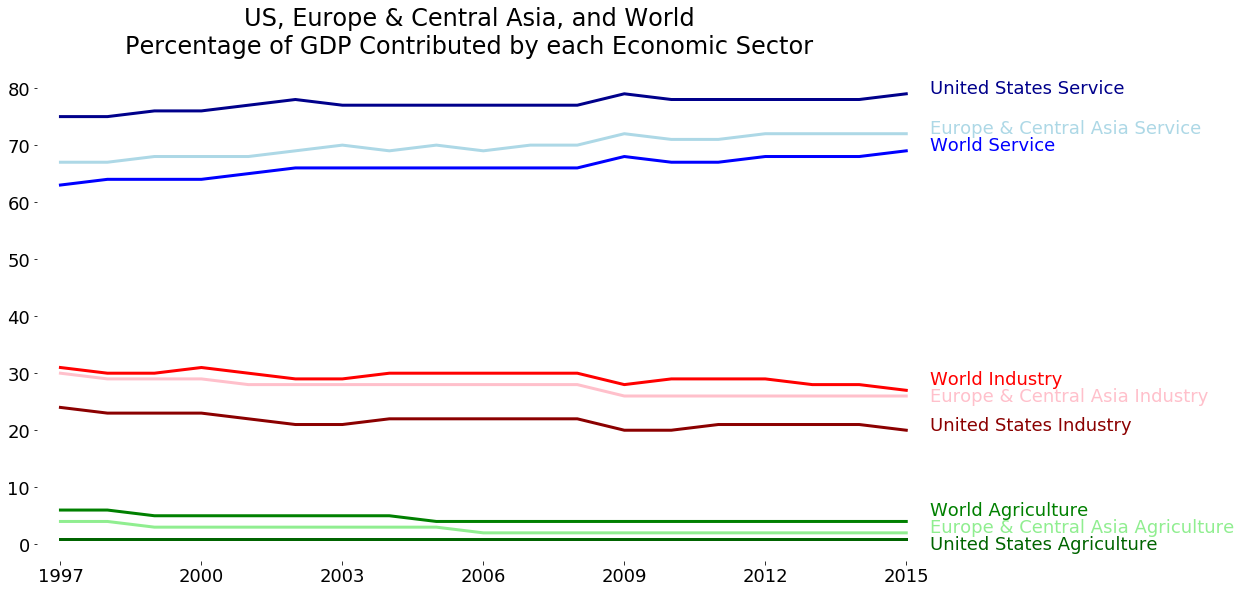

In [60]:
dataset_list = [(extract_data('1997', '2015',\
        ['World', 'Europe & Central Asia', 'United States']))]

y_offsets = {'World Industry': 1,
             'Europe & Central Asia Industry': -1,
             'World Agriculture': 1,
             'United States Agriculture': -2}

print_3_index_line_plot(dataset_list, y_offsets, 
     'US, Europe & Central Asia, and World\n' +\
     'Percentage of GDP Contributed by each Economic Sector')
plt.show()

This growth of the service economy is even more dramatic when viewed on the basis of per-capita GDP for the US, Europe & Central Asia, and the World. See the following.

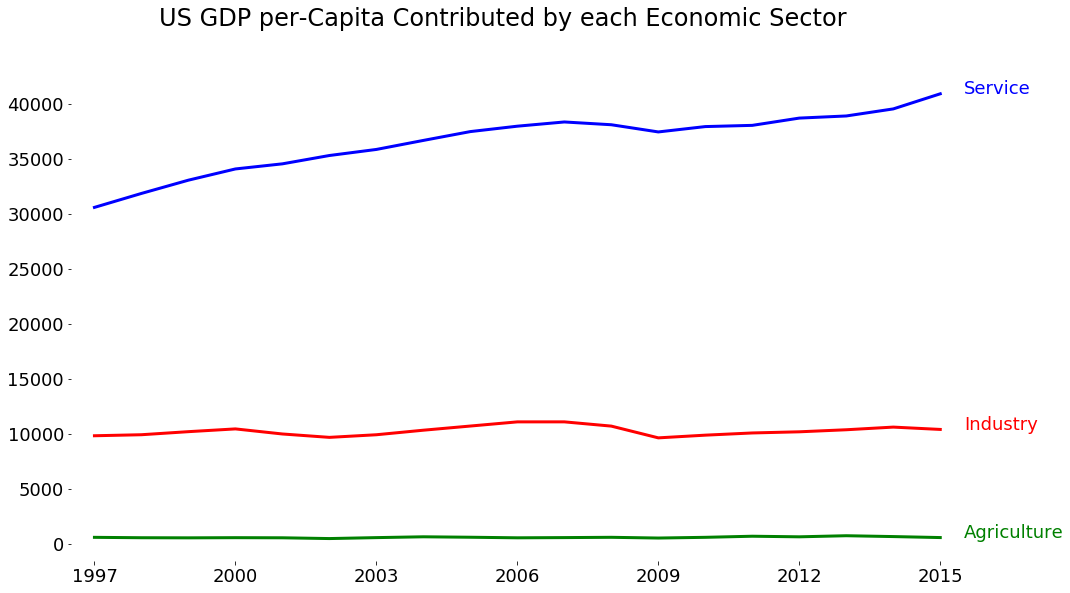

In [61]:
dataset_list = [extract_data('1997', '2015', ['United States'],\
                              dollars=True)]
print_1_index_line_plot(dataset_list,\
    'US GDP per-Capita Contributed by each Economic Sector')
plt.show()

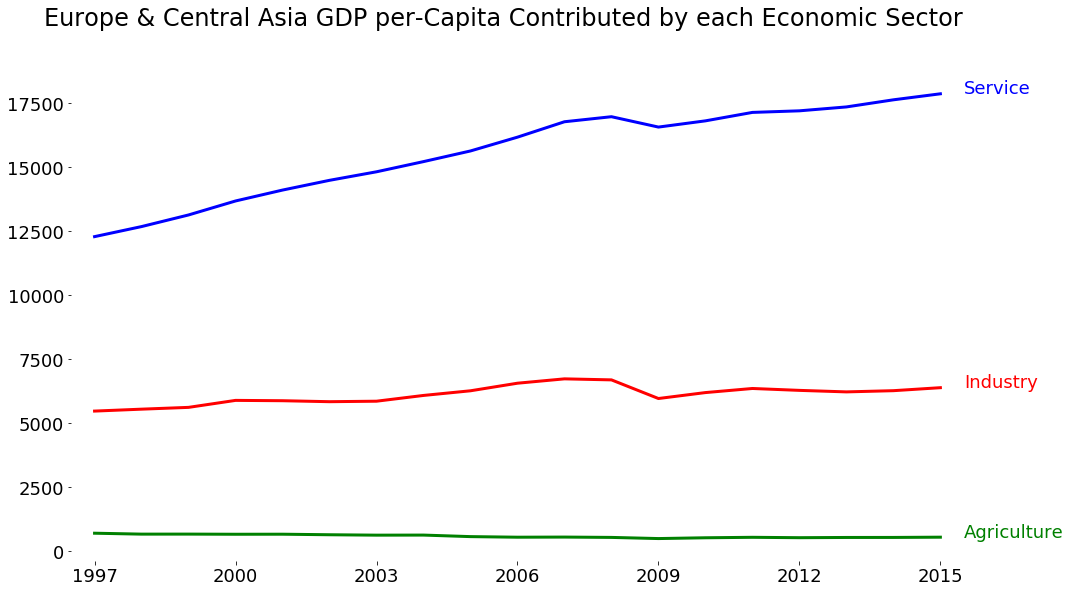

In [62]:
dataset_list = [extract_data('1997', '2015', ['Europe & Central Asia'],\
                             dollars=True)]
print_1_index_line_plot(dataset_list,\
    'Europe & Central Asia GDP per-Capita Contributed by each '\
    + 'Economic Sector')
plt.show()

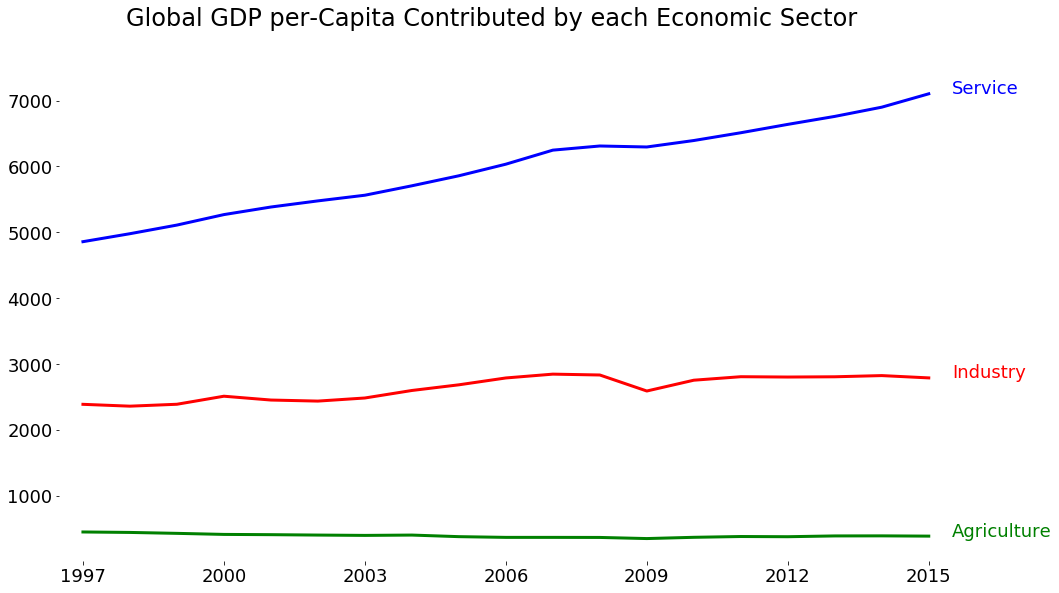

In [63]:
dataset_list = [extract_data('1997', '2015', ['World'],\
                             dollars=True)]
print_1_index_line_plot(dataset_list,\
    'Global GDP per-Capita Contributed by each Economic Sector')
plt.show()

Perhaps the most striking way of describing the impact of emerging service economy is as a percentage of per-capita economic growth between 1997 and 2015. The following cells present this breakdown for the United States, Europe & Central Asia, and the World.

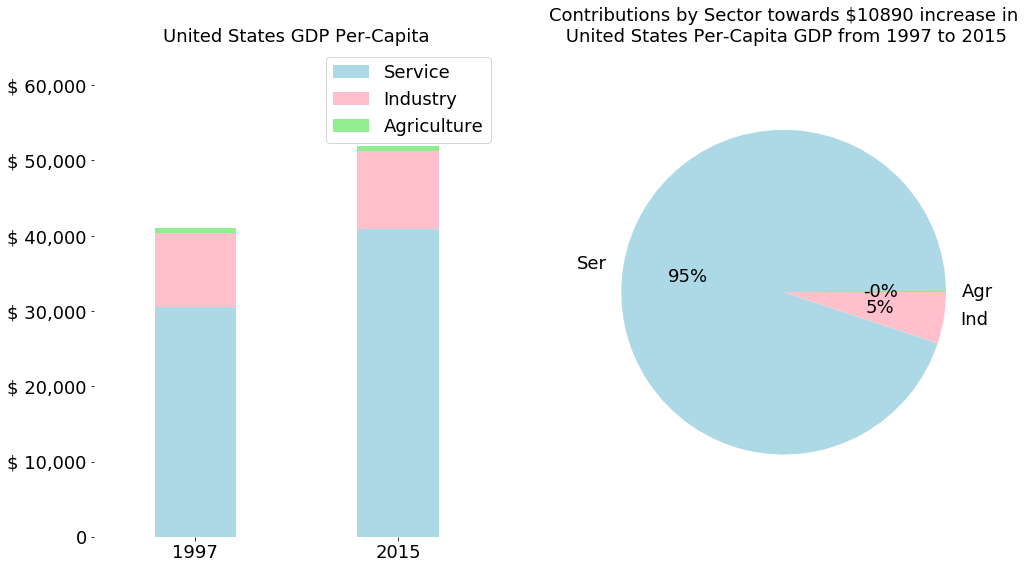

In [64]:
print_growth_info_graphic('United States')

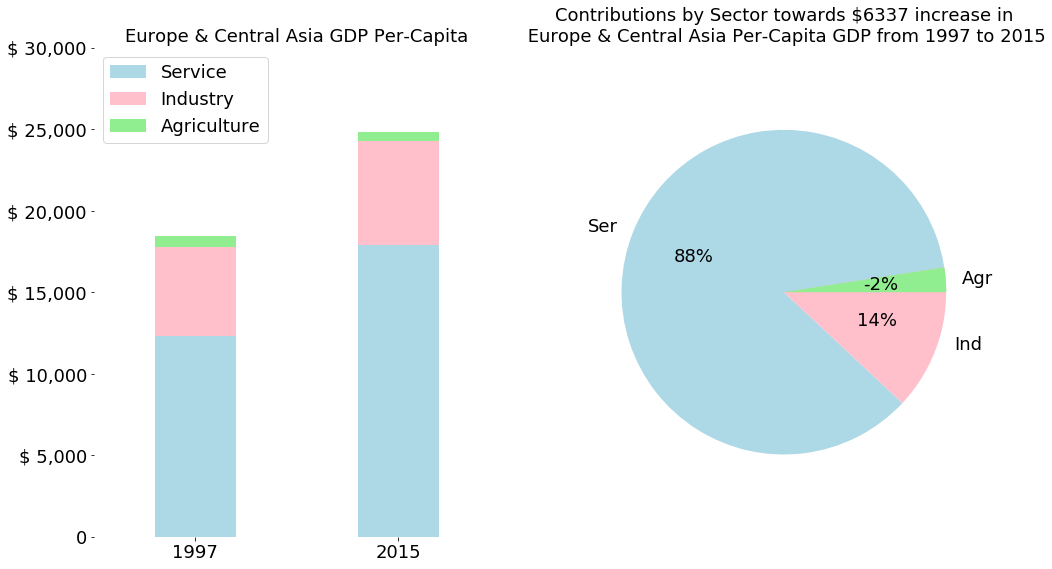

In [65]:
print_growth_info_graphic('Europe & Central Asia')

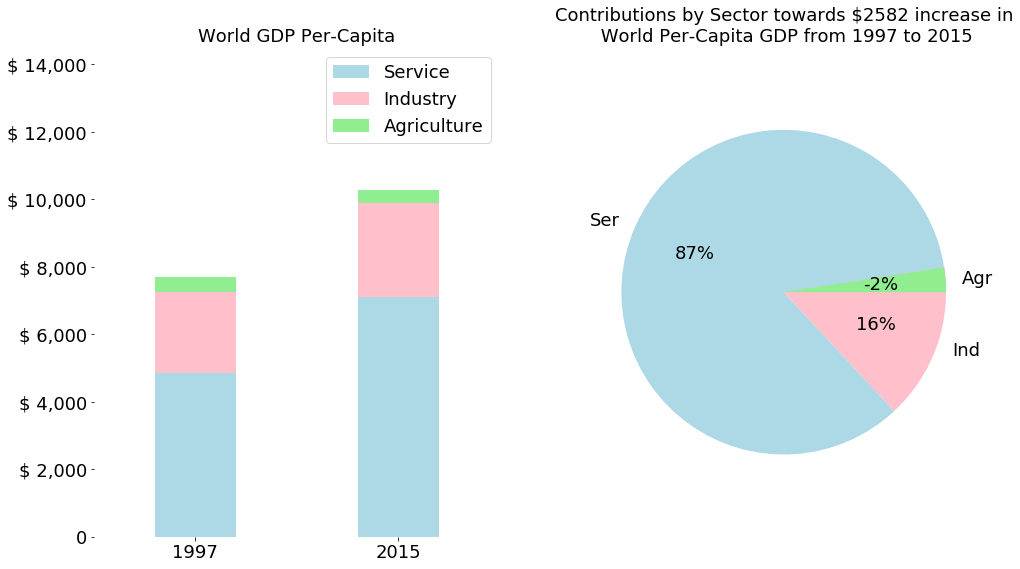

In [66]:
print_growth_info_graphic('World')

As shown above, growth in the service sector accounts for 94% of US per-capita GDP growth from 1997 to 2015. It accounted for 87% of worldwide GDP growth over the same time period. Thus, for the time being, the service sector appears to be the dominant driving force for continued national and global economic expansion.

On the basis of the trajectory of the plots above, and the foregong analysis, the service economy can be expected to continue growing, both in in terms of percentage of global GDP and in absolute terms.

<a id='2'></a>
### 2. Does service-sector economic activity tend to be concentrated within any particular geographic regions?

As shown in the plots below, in 2015, the service sector accounted for a majority of the economic output for all of the regions with available data.

North America has the largest service sector on a percentage basis, at 79% of total regional economic output. South Asia has the smallest service sector, at 54% of total output.

Closer inspection reveals that the regions with the most developed economies also tend to have the largest service sector economies.

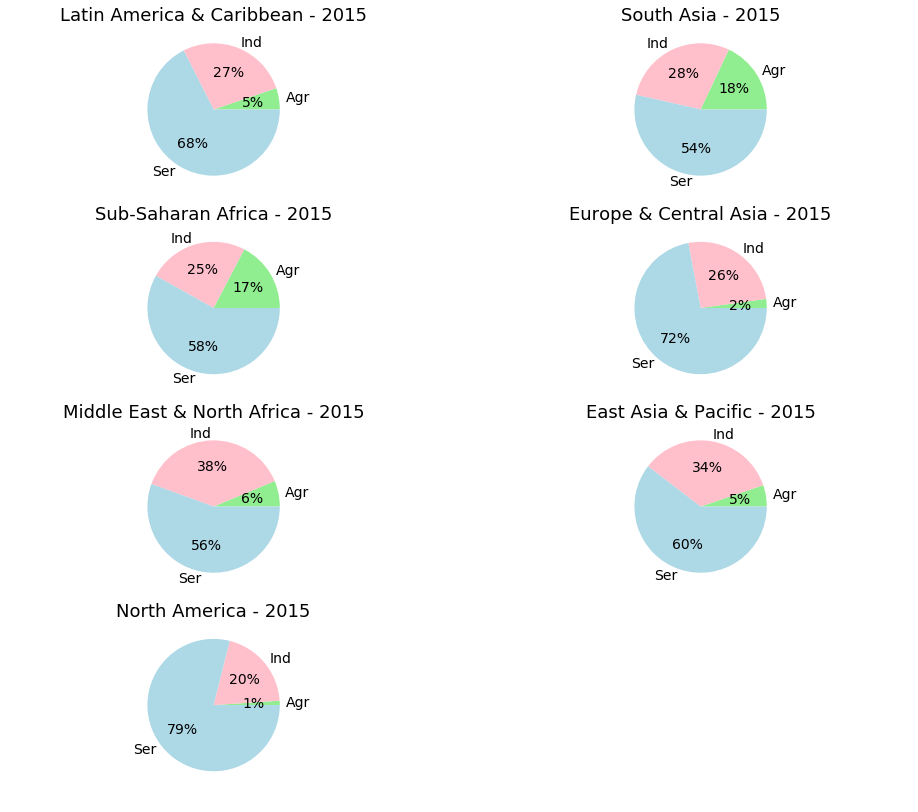

In [67]:
print_pies(region_group, '2015')

<a id='3'></a>
### 3. Does service-sector economic activity tend to be concentrated within any particular economic groupings of countries? (ex: high income countries, low income countries...)

As shown below, for any given year, higher income countries have larger service sector economies. Lower income countries have larger agricultural sector economies. The countries with moderate incomes tend to have the largest concentrations of industry.

The trends are very clear, and can be accounted for by considering how developed the economies within each grouping are. High income economies can be expected to be most developed, and therefore have passed through both economic revolutions (industrial and service). Low income economies are least developed, and therefore a large part of their economic activity is still attributable to agriculture.

It is also helpful to visualise the changing economic constituencies of the different economic groups over time. The data is visualised at 9-year intervals over the time period for which data for all four income groups are available (1997 to 2015). Visualised in this manner, each group's economic progression over time becomes readily apparent.

Note that for each 9-year period visualised, agriculture's contribution to each region's economy decreases. Services' relative contribution, on the other hand, increases for each country over each time period. For some time periods, industry's contribution to the lower income group increases. This indicates that some lower income countries may be going through a delayed industrial revolution.

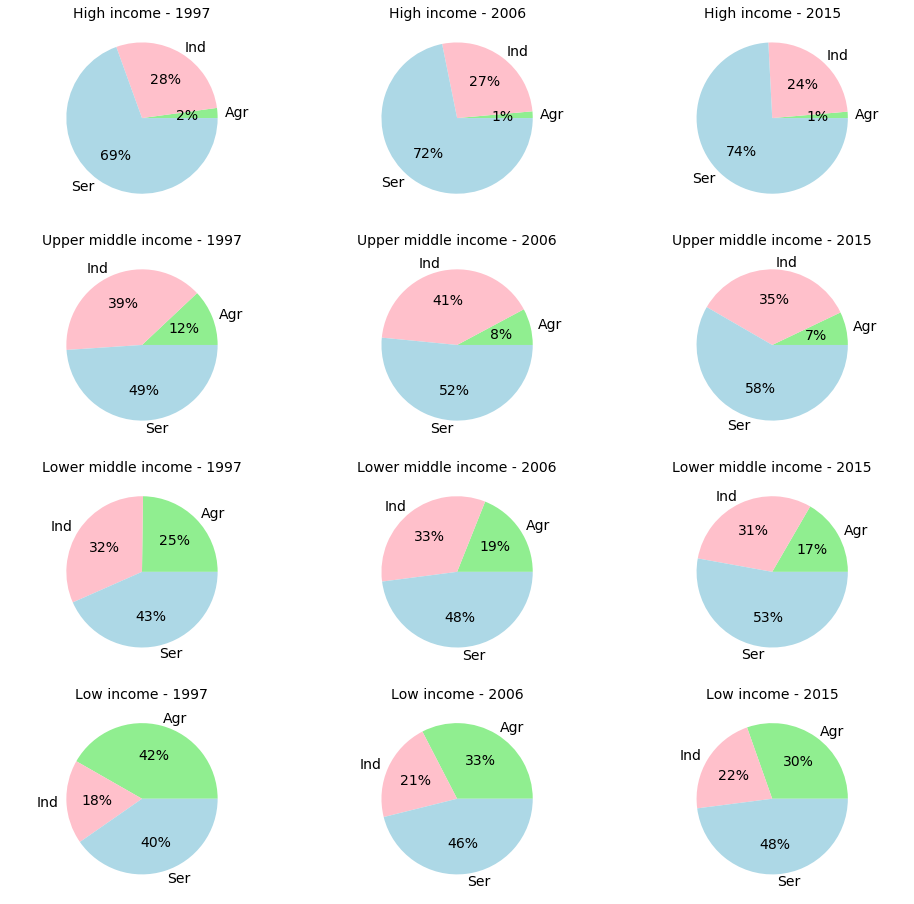

In [68]:
income_ordered_group = ['High income',
                       'Upper middle income',
                       'Lower middle income',
                       'Low income']
print_time_delta_pies(income_ordered_group, '1997', '2006', '2015')

As shown in the table lookup produced below, the countries with the smallest service sector economies tend to be low income. The most common regions for low income countries was Sub-Saharan Africa. Conversely, countries with the largest service sector economies tend to be high income. These high income countries are primarily advanced economies in Europe and Central Asia.

In [69]:
largest_ser = ser_df.nlargest(10, '2015').index
print('10 Countries with the Largest service sectors')
print(meta_df.loc[largest_ser])
print('\n')

smallest_ser = ser_df.nsmallest(10, '2015').index
print('10 Countries with the Smallest service sectors')
print(meta_df.loc[smallest_ser])

10 Countries with the Largest service sectors
                                    Region Group         Income Group
Country Name                                                         
Hong Kong SAR, China         East Asia & Pacific          High income
Barbados               Latin America & Caribbean          High income
Andorra                    Europe & Central Asia          High income
Bahamas, The           Latin America & Caribbean          High income
Luxembourg                 Europe & Central Asia          High income
Cyprus                     Europe & Central Asia          High income
St. Lucia              Latin America & Caribbean  Upper middle income
Malta                 Middle East & North Africa          High income
Maldives                              South Asia  Upper middle income
Greece                     Europe & Central Asia          High income


10 Countries with the Smallest service sectors
                          Region Group         Income Group
Count

<a id='4'></a>
### 4. Do countries tend to progress through an industrial revolution before developing a significant services sector?

China (see chart below) exhibits the exact economic progression that one would expect, given what economists have come to understand about economic development. In particular, the expected pattern is that agriculture begins as the dominant economic sector, but it declines in relative importance as industry, and later, services, increase.

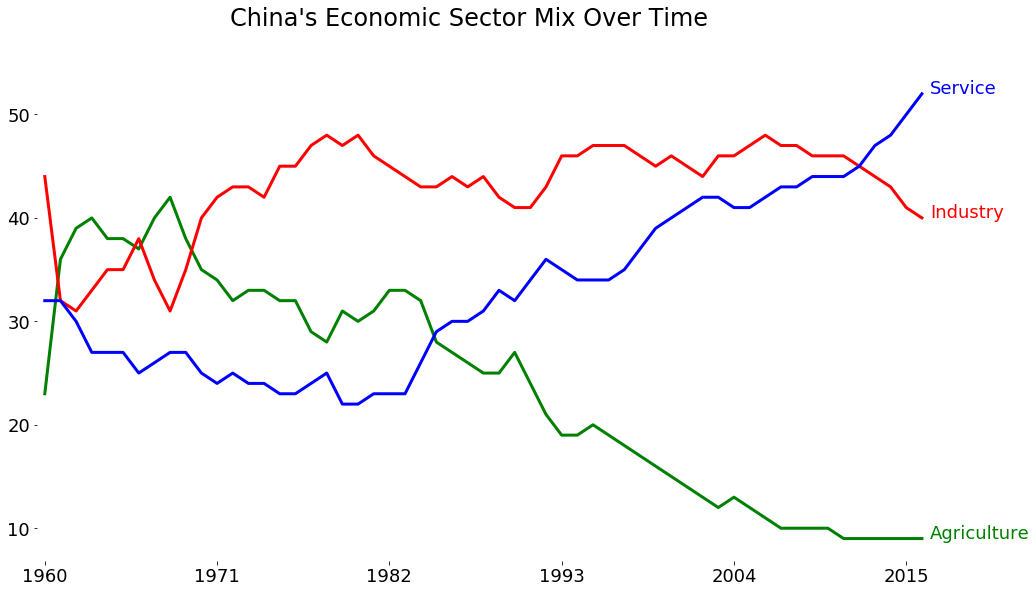

In [70]:
dataset_list = [extract_data('1960', '2016', ['China'])]
print_1_index_line_plot(dataset_list,\
    'China\'s Economic Sector Mix Over Time')

After some examination of development patterns for various countries, it appears China may be atypical for its very large industry base. China is frequently compared to Brazil, Russia, and India since they are all rapidly developing economies (and known collectively as the "BRIC" countries). For each of those three countries, the services sector has been dominant for a number of decades, and eclipsed industry earlier than might be expected.

India's pattern of economic development, where services become the predominant sector and industry remains relatively constant over time, appears to more typical of economic development of countries than China's massive industrialisation.

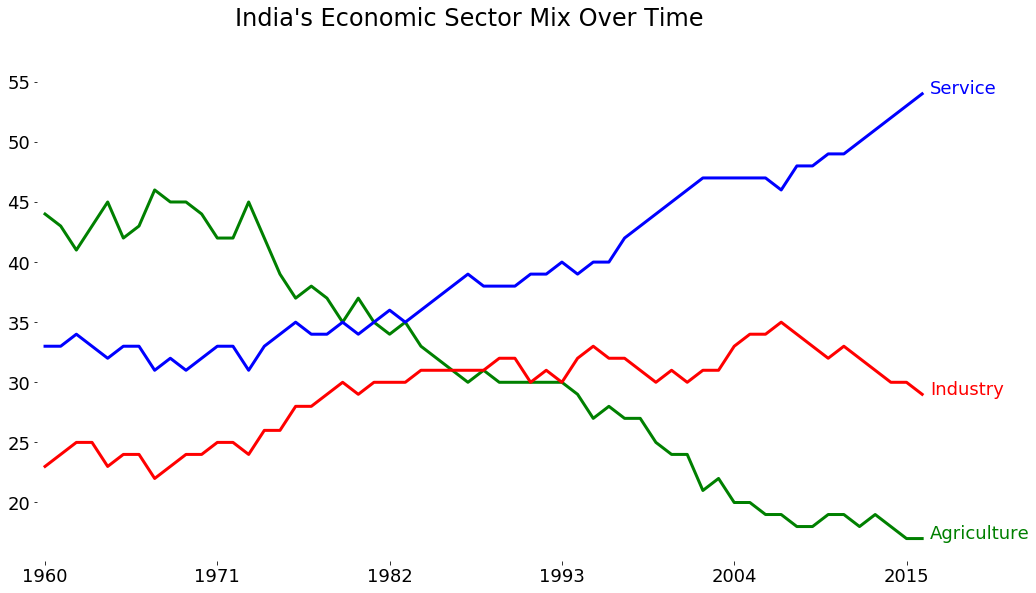

In [71]:
dataset_list = [extract_data('1960', '2016', ['India'])]
print_1_index_line_plot(dataset_list,\
    'India\'s Economic Sector Mix Over Time')

See three further examples superimposed on below. The countries are dissimilar with regard to geographic region classification, so these development patterns are not peculiar to a particular geography or set of natural resources. Rather this pattern appears to be fairly consistent for developing nations.

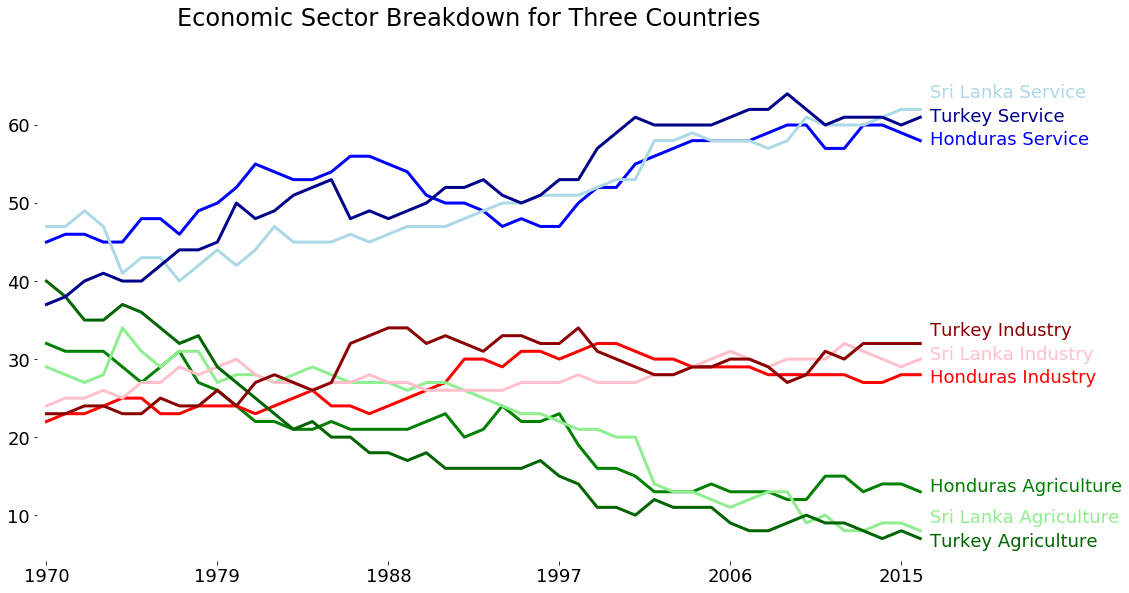

In [72]:
dataset_list = [extract_data('1970', '2016',\
                             ['Honduras', 'Sri Lanka', 'Turkey'])]

y_offsets = {'Sri Lanka Service': 1.5, 
             'Sri Lanka Agriculture': 1,
             'Turkey Agriculture': -1,
             'Turkey Industry': 1,
             'Turkey Service': -0.5,
             'Honduras Service': -0.5,
             'Honduras Industry': -1}

print_3_index_line_plot(dataset_list, y_offsets,\
    'Economic Sector Breakdown for Three Countries')

Finally, an examination of the economic breakdown of countries classified by the UN as "low income" shows that the average impoverished country may not heavily industrialise at all. Rather, it appears they often emerge from agriculturally-based economies straight into predominantly service-based economies.

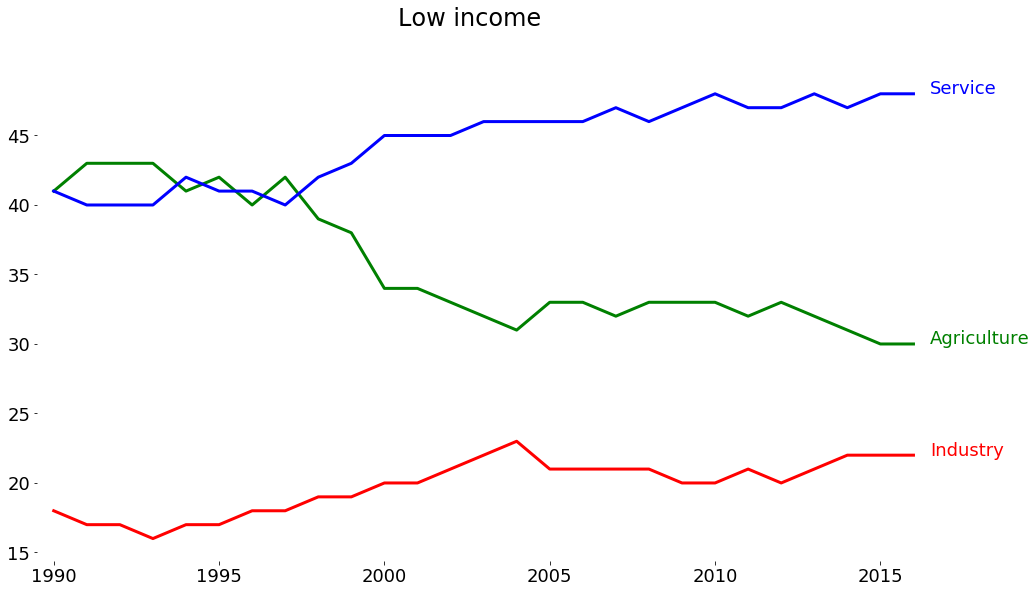

In [73]:
dataset_list = [extract_data('1990', '2016', ['Low income'])]
print_1_index_line_plot(dataset_list, 'Low income')

<a id='conclusions'></a>
## Conclusions

Several conclusions can be presented from the analysis presented herein. Among these:

* The service economy has been and will most likely continue to be the primary engine for economic growth, both nationally and globally, for the foreseeable future. The previous two decades have shown substantially increased economic output driven primarily by the service sector.

* Service sector economic activity is broadly distributed with regard to geographic region. In 2015, no geographic region profiled herein had a service sector that accounted for less than 50% of its economic output.

* Service sector economic activity forms a larger part of higher-income, advanced economies than it does for lower-income, less advanced economies. With this said, the difference is not so pronounced as one might expect. In 2015, service sectors accounted for 48% of total economic output for low income countries. In the same year, the service sector accounted for 74% of total economic output for high income countries.

* It is not necessarily true that a large industrial sector always proceeds development of a large service sector. In fact, this analysis presented 4 examples of countries wherein the service sector became the largest part of the national economy before industry had even surpassed agriculture as measured by percent of the overall national economy. Despite this, as countries develop and increase in per-capita income, the tendency is for the service sector to gradually eclipse the agriculture and industry sectors. In the same way that Africa has been able to adopt cell phone technology without the intervening landline technology, today's advanced economies likely "paved the way" for today's developing economies to establish robust service sectors without needing to make substantial investments in industry.

### Possible Improvements to this study

* Perform country-by-country analysis of the order of emergence of industry and service sectors.
* Obtain a longer-term dataset. As discussed in the introduction, the industrial revolution began long before 1960, the start date for this dataset. 
* Obtain a more complete dataset. Only 12% of the countries have complete data from 1960 to 2016. For the 25-year time period from 1990 to 2015, roughly 50% of countries have complete data.
* Perform more robust error checking and handling. Another way to handle percentages that sum to something other than 100% would be to introduce a scaled weighting factor that would scale each sectors' contribution such that they together sum to 100%. Whether or not this is appropriate depends on the nature of the problem with the data.